# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   island_ids                1863 non-null   int64  
 1   year                      1863 non-null   int64  
 2   pseudo_year               1863 non-null   int64  
 3   region_codes              1863 non-null   object 
 4   prefecture_codes          1863 non-null   int64  
 5   population                1723 non-null   float64
 6   treatment_group           1863 non-null   int64  
 7   treatment_group_mainland  1863 non-null   int64  
 8   bridge_year               1863 non-null   int64  
 9   pseudo_bridge_year        1863 non-null   int64  
 10  after_treatment           1863 non-null   int64  
 11  connect_mainland_year     1863 non-null   int64  
 12  after_treatment_mainland  1863 non-null   int64  
 13  income                    1401 non-null   float64
 14  area_km2

In [84]:
pop = df['population']
log_pop = df['log_pop']
pop_star = df['pop_star']
log_pop_star = df['log_pop_star']

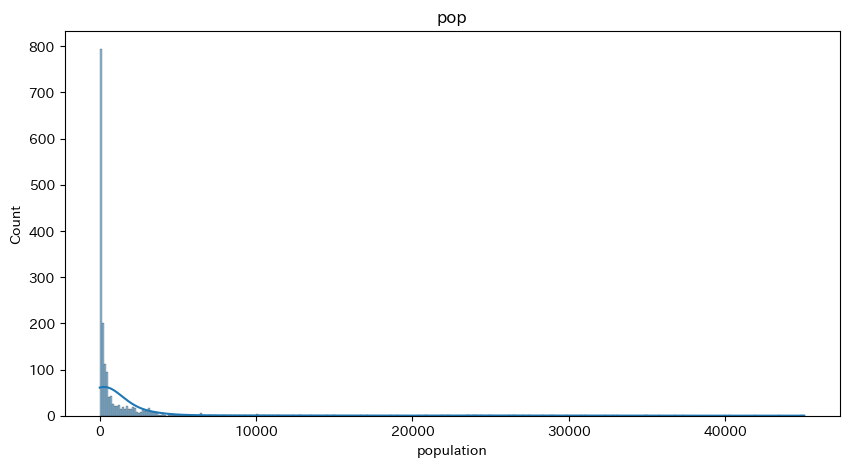

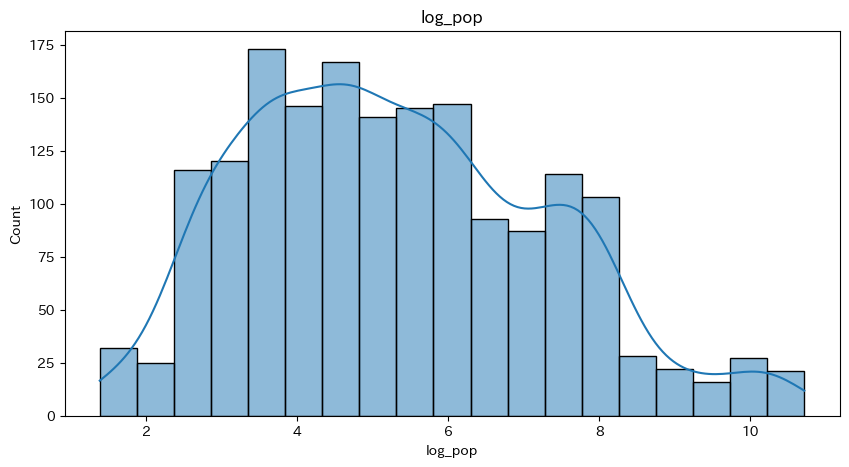

In [85]:
plt.figure(figsize=(10, 5))

sns.histplot(pop, kde=True)
plt.title('pop')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop, kde=True)
plt.title('log_pop')
plt.show()

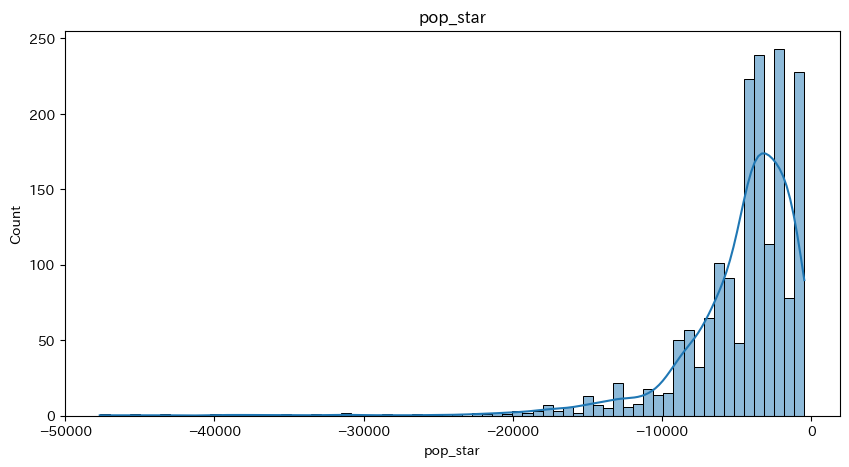

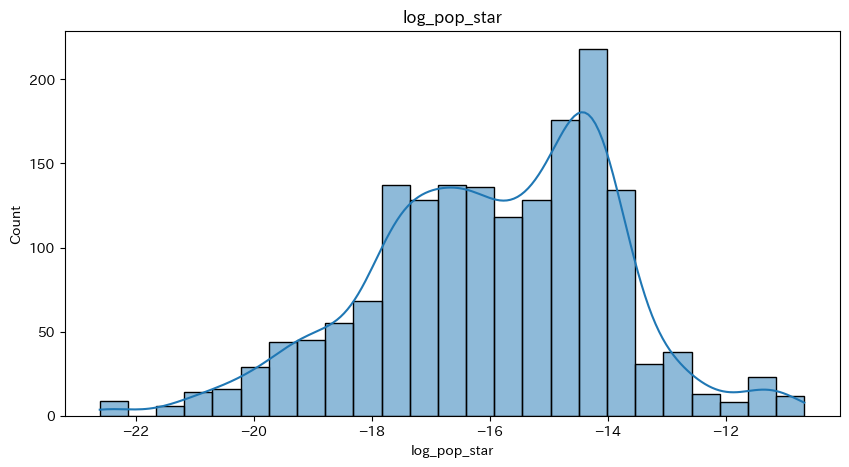

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(pop_star, kde=True)
plt.title('pop_star')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop_star, kde=True)
plt.title('log_pop_star')
plt.show()

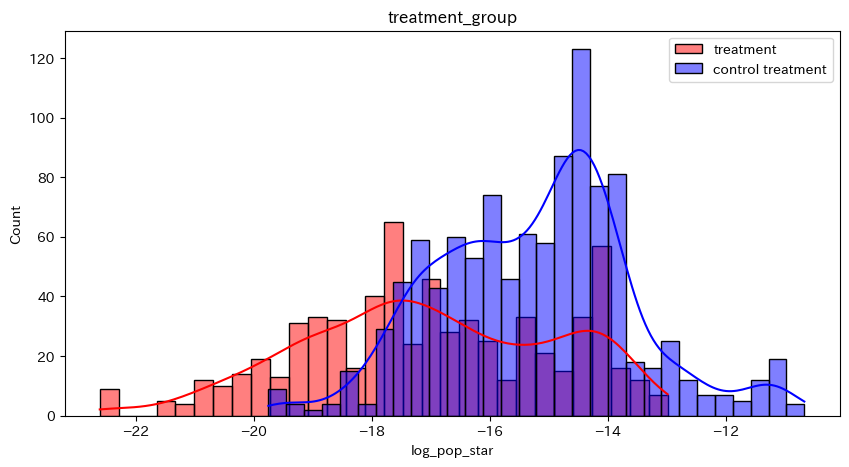

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['treatment_group'] == 1], bins=30, kde=True, color='red', label='treatment')
sns.histplot(df['log_pop_star'][df['treatment_group'] == 0], bins=30, kde=True, color='blue', label='control treatment')
plt.title('treatment_group')
plt.legend()
plt.show()

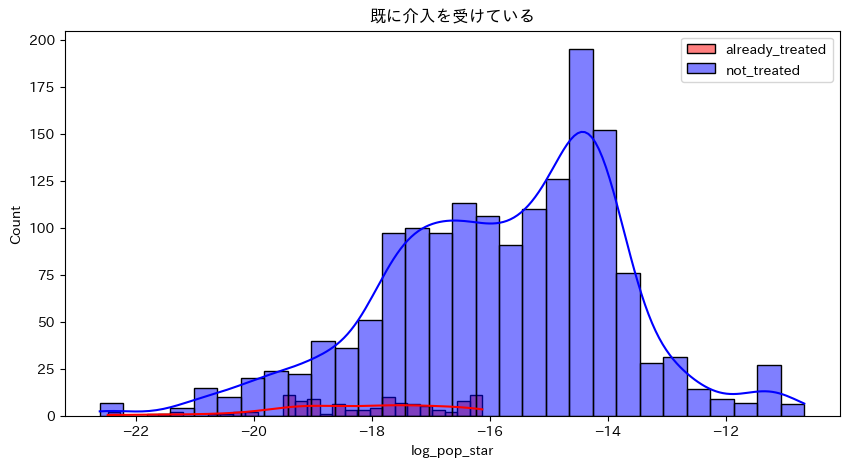

In [88]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 1], bins=30, kde=True, color='red', label='already_treated')
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 0], bins=30, kde=True, color='blue', label='not_treated')
plt.title('既に介入を受けている')
plt.legend()
plt.show()

## 推移

/tmp/ipykernel_62307/2383172923.py:2: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])


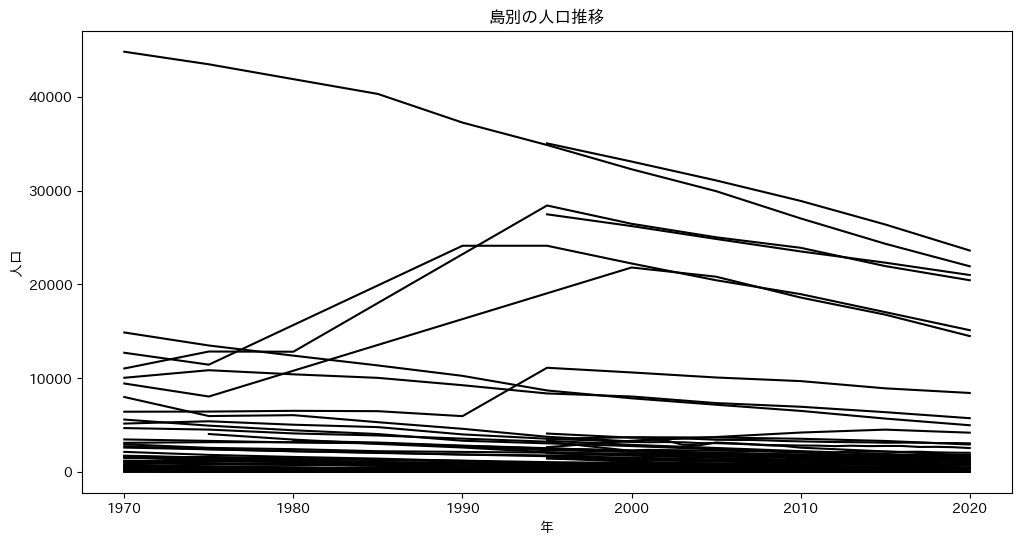

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])
plt.title('島別の人口推移')
plt.ylabel('人口')
plt.xlabel('年')
plt.legend().remove()
plt.show()